# SECOND OPERATION FORM

![title](formulas/oven12.png)

### Heat released by propane "Hin"

In [1]:
Hin_oven1=23.44 #kW
print('Hin_oven1=',"%.4f"% Hin_oven1 ,'kW')

Hin_oven1= 23.4400 kW


### Air flow

![title](formulas/volumetrico1.png)

In [2]:
p_atm=101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa*m^3/kg*K
T_freshair= 25+273 # K
d_air= p_atm/(R_air*(T_freshair)) # kg/m^3
print ('density of air=',"%.4f"% d_air ,'kg/m^3')

density of air= 1.1847 kg/m^3


In [3]:
import numpy as np
pi=np.pi
Ac1= (pi*((1.5)*.0254)**2)/4 # Diameter 1.5 was given in inches
print ('Transversal area of the tube=',"%.4f"% Ac1 ,'m^2')

Transversal area of the tube= 0.0011 m^2


In [4]:
h= 6.9*.0254 #pulg-->m INVENTED VALUE
Vel_air=((2*9.81*h*1000)/d_air)**.5 # m/s
print ('Velocity of air=',"%.4f"% Vel_air ,'m/s')
Vflow= Vel_air*Ac1 #m^3/s
print ('Air volumetric flow=',"%.4f"% Vflow ,'m^3/s')
print ('Air volumetric flow=',"%.4f"% float(Vflow*3600) ,'m^3/h')

Velocity of air= 53.8743 m/s
Air volumetric flow= 0.0614 m^3/s
Air volumetric flow= 221.1180 m^3/h


### Heat recovered by the exchanger "Hre"

Air flow to calculate Hre is the same of the inlet, because it hasn't divided.

![title](formulas/hre12.png)

![title](formulas/hrepoints1.png)

In [21]:
Patm= 101.325 # Atmospheric pressure of furnace's location kPa PENDING
R_air= 0.287 # kPa m^3/ kg K
T_freshair= 25+273 # K
Cp_re= 1.007  # Cp@25°C kJ/kg*K
T_preheatedair= 165+273   # Temperature of heated air MEASURED
T_average_re=(T_freshair+T_preheatedair)/2 # K
Heat_re= (Patm/(R_air*T_average_re))*Vflow*Cp_re*(T_preheatedair-T_freshair)
print('Hre=',"%.4f"% Heat_re, 'kW')

Hre= 8.3074 kW


### Heat lost by the exhaust air in the beginning of the stack "Hoff"

![title](formulas/exhaust12.png)

![title](formulas/onlyhoff2.png)

In [23]:
f=1/6
Cp_off= 1.135  #Cp@700°C kJ/kg*K
T_insideoven= 720+273  # Temperature of air inside the oven INVENTED
T_average_off=(T_insideoven+T_freshair)/2 # K
Heat_off= (Patm/(R_air*T_average_off))*(1-f)*Vflow*Cp_off*(T_insideoven-T_freshair)
print('Hoff= ', "%.4f"%Heat_off, 'kW')

Hoff=  22.0831 kW


### Heat lost by the exhaust air in the end of the stack "Hexhaust"

![title](formulas/exhaust11.png)

![title](formulas/onlyexhaust.png)

In [32]:
Cp_exhaust= 1.056  #Cp@350°C kJ/kg*K
T_exhaust= 335+273  # Temperature of exhaust air MEASURED
T_average_exhaust=(T_exhaust+T_freshair)/2 # K
Heat_exhaust= (Patm/(R_air*T_average_exhaust))*(1-f)*Vflow*Cp_exhaust*(T_exhaust-T_freshair)
print('Hexhaust= ',"%.4f"% Heat_exhaust, 'kW')

Hexhaust=  13.0588 kW


### Heat lost through the oven's door "Hdoor"

![title](formulas/door.png)

![title](formulas/onlyhdoor.png)

In [34]:
Cp_off= 1.135  #Cp@700°C kJ/kg*K
T_insideoven= 720+273  # Temperature of air inside the oven INVENTED
T_average_off=(T_insideoven+T_freshair)/2 # K
Heat_door= (Patm/(R_air*T_average_off))*f*Vflow*Cp_off*(T_insideoven-T_freshair)
print('Hoff= ', "%.4f"%Heat_door, 'kW')

Hoff=  4.4166 kW


### Heat lost through the stack's walls "Hwx"

![title](formulas/exhaust14.png)

![title](formulas/hoff12.png)

![title](formulas/wstack1.png)

In [36]:
Heat_wx= Heat_off-Heat_re-Heat_exhaust
print('Hwx= ',"%.4f"% Heat_wx, 'kW')

Hwx=  0.7169 kW


### Heat lost by the walls in contact with the air inside the oven

![title](formulas/walloven12.png)

In [37]:
Kfc= 0.21 # W/m*K SEARCHING IN THE WEB
Klr= 0.76 # W/m*K SEARCHING IN THE WEB
Kac= 58 # W/m*K SEARCHING IN THE WEB
fc=.0254**2 # Conversion factor in^2-->m^2
Tsi9=1500 # INVENTED
Tso9=130 # MEASURED
Tsi10=1500 #INVENTED
Tso10=130 #MEASURED
Tsi11=1500 #INVENTED
Tso11=130 #MEASURED
Tsi12=1500 #INVENTED
Tso12=130 #MEASURED
A9=12*24*fc # m^2
A10=24*45.5*fc # m^2
A11=12*45.5*fc # m^2
A12=12*45.5*fc # m^2

Heat_Wall3= (((Tsi9-Tso9)/(2/(Kfc*A9)+2/(Kfc*A9))+(Tsi10-Tso10)/(9/(Klr*A10)+2.5/(Kfc*A10)+4/(Kac*A10)) \
        +(Tsi11-Tso11)/(9/(Klr*A11)+2.5/(Kfc*A11)+4/(Kac*A11))+(Tsi12-Tso12)/(9/(Klr*A12)+2.5/(Kfc*A12)+4/(Kac*A12)))*(1/.0254))/1000
print('Hwall=',"%.4f"%Heat_Wall3, 'kW')

Hwall= 3.7173 kW


### Heat lost by the walls in contact with the melted glass inside the oven

![title](formulas/mgoven12.png)

In [38]:
Tmg=1100 # THIS VALUES WAS GIVEN
Tso13=120 # MEASURED
Tso14=120 #MEASURED
Tso15=120 #MEASURED
Tso16=120 #MEASURED
A13=12*12*fc
A14=24*12*fc
A15=12*12*fc
A16=12*24*fc

Heat_Wall4= (((Tmg-Tso13)/(9/(Klr*A13)+2.5/(Kfc*A13)+4/(Kac*A13))+(Tmg-Tso14)/(9/(Klr*A14)+2.5/(Kfc*A14)+4/(Kac*A14)) \
        +(Tmg-Tso15)/(9/(Klr*A15)+2.5/(Kfc*A15)+4/(Kac*A15))+(Tmg-Tso16)/(2.5/(Klr*A16)+1/(Kfc*A16)))*(1/.0254))/1000
print('Hmg=', "%.4f"%Heat_Wall4, 'kW')

Hmg= 1.4924 kW


In [39]:
Heat_Wall3+Heat_Wall4+Heat_off+Heat_door-Hin_oven1-Heat_re

-0.03806158021538231

### Sankey diagram of the heat flows

In [40]:
#%matplotlib notebook
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

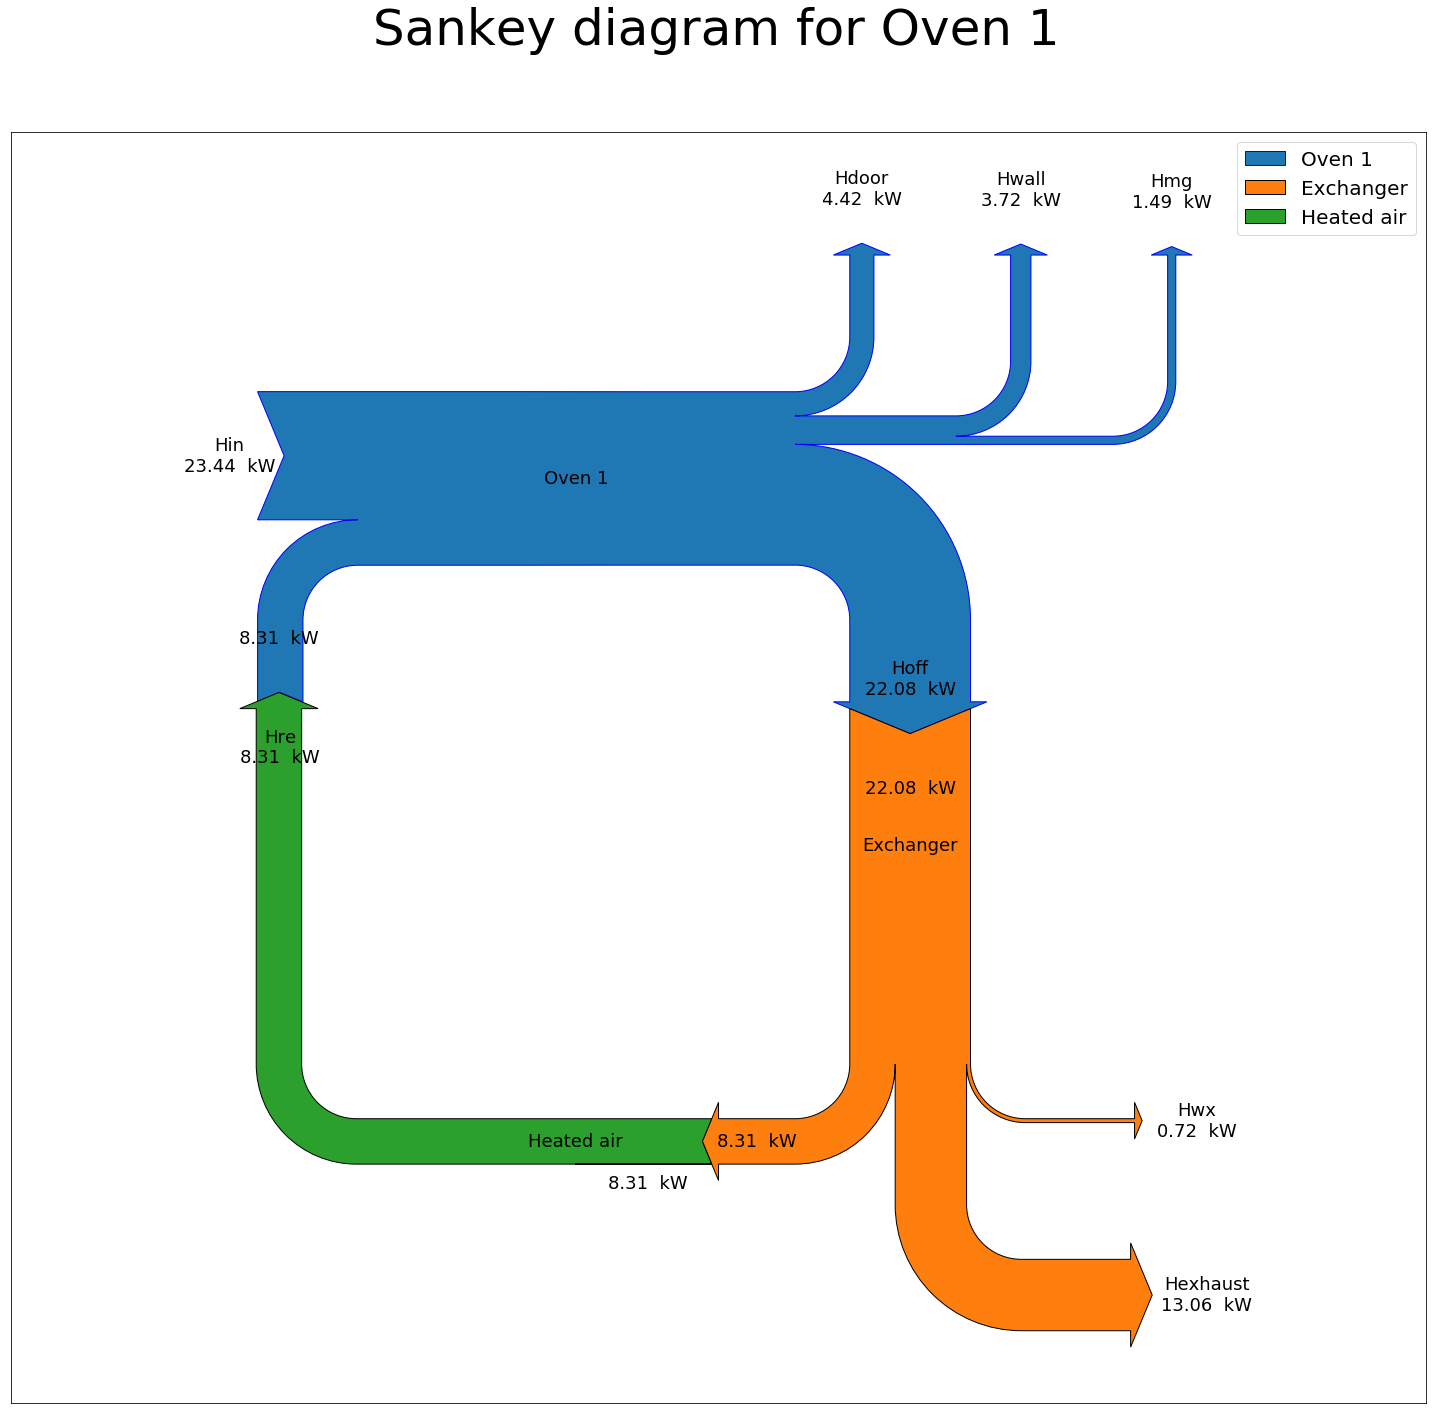

In [41]:
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Sankey diagram for Oven 1", fontsize=18)
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])

sankey = Sankey(ax=ax, scale=0.01, format='%.2f', offset=0.1, unit='  kW', head_angle=135)

sankey.add(flows= [Hin_oven1,Heat_re,-Heat_door,-Heat_Wall3,-Heat_Wall4,-Heat_off], label='Oven 1',
           orientations=[0,-1,1,1,1,-1], patchlabel='Oven 1',labels=['Hin','Hre','Hdoor','Hwall',
                                                                               'Hmg',''],color='b')

sankey.add(flows=[Heat_off,-Heat_wx,-Heat_re,-Heat_exhaust], label='Exchanger', 
          orientations=[0, 1, -1, 1], patchlabel='Exchanger',pathlengths=[0,.3,.24,.3],labels= ['Hoff','Hwx'
                                                                            ,'\n\n\n','Hexhaust'],
                                                                             prior=0, connect=(5, 0))

sankey.add(flows=[Heat_re,-Heat_re], label='Heated air',
          orientations=[0, -1], patchlabel='Heated air', pathlengths=[0,.75], prior=1, connect=(2, 0))



fig.suptitle( "Sankey diagram for Oven 1", fontsize=50)
diagrams = sankey.finish()

#diagrams[0].patch.set_color([1,0.5,.5,1])

for flechita in diagrams:
    flechita.text.set_fontsize(18)

    for t in flechita.texts:
        t.set_fontsize(18)
        

#diagrams[0].patch.set_color
#diagrams[1].patch.set_color([.5,1,.5,1])
#diagrams[2].patch.set_color([.8,.6,.5,1])
#plt.savefig("jikmdd.jpg")
plt.tight_layout( rect=[0,0,1,0.9] )
plt.legend(fontsize=20)